# カーブフィッティング

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import scipy as sp
from scipy.optimize import curve_fit
from scipy.stats import bernoulli, norm, poisson, expon
import japanize_matplotlib

## カーブフィッティングとは？

手元にあるデータをある理論曲線に当てはめることを**カーブフィッティング**と呼ぶ．
データ分析では，以下の場面でカーブフィッティングが用いられる：

1. 回帰分析
   - 複数の変数から成るデータに対して説明変数と目的変数の間の関数関係（回帰モデル）を仮定し，パラメータを調整して当てはめる
2. 確率分布のパラメータ推定
   - 手元のデータから求めたヒストグラムに対して理論的な確率分布を仮定し，そのパラメータを推定する
   - 推定したパラメータを用いてヒストグラムに理論分布を当てはめる

※ 統計モデルでは，回帰分析における関数関係や理論的な確率分布など，データを当てはめる理論曲線そのものをモデルと呼ぶ．
一方，物理モデルでは，理論曲線のことはモデルと呼ばずに，理論曲線を導くための単純化した基礎方程式などをモデルと呼ぶ．

## 回帰分析

### 回帰モデル

データ $ X, Y $ が与えられたとき，変数 $ X,\ Y $ の間に

$$
	y = f(x; \boldsymbol{\theta}) + \varepsilon
$$(eq:regression_model)

という関数関係が成り立つとする．
ここで，$ f(x; \boldsymbol{\theta}) $ は変数 $ X $ の関数で $ \boldsymbol{\theta} = (\theta_1, \theta_2, \ldots) $ はパラメータである．
また，$ \varepsilon $ は特定の確率分布に従う乱数であり，確率的な誤差を表している．
この式は，与えられたデータ $ x $ に対して $ y $ を生成する数理モデルであり，**回帰モデル**と呼ばれる．
また，$ X $ を**説明変数**（独立変数），$ Y $ を**目的変数**（従属変数，被説明変数）と呼ぶ．
**回帰分析**とは，回帰モデルを用いて説明変数と目的変数の間の関係を明らかにする手法である．

回帰モデルのうち，式{eq}`eq:regression_model`のように説明変数が1つだけの場合を**単回帰モデル**，説明変数が複数ある場合を**重回帰モデル**と呼ぶ．
また，説明変数の１次関数で表されるモデルを**線形回帰モデル**，非線形な関数の場合を**非線形回帰モデル**と呼ぶ．
以下では，単回帰モデルのみを扱う．

### 最小二乗法

１つの説明変数 $ X $ と目的変数 $ Y $ について $ n $ 組のデータ $ (x_{1}, y_{1}), \ldots, (x_{n}, y_{n}) $ を取得したとする．
このとき，横軸に変数 $ X $，縦軸に変数 $ Y $ を取ったグラフを**散布図**と呼ぶ．
散布図に対し，回帰モデル{eq}`eq:regression_model`のパラメータを変化させて理論曲線をうまく当てはめる作業がカーブフィッティングである．
カーブフィッティングによって得られた式 $ f(x; \boldsymbol{\theta}) $ （**回帰曲線**）にデータ $ x_{i} $ を代入すると回帰モデルによる予測値が得られる．
以下では，この予測値をハット $\hat{}$ を付けて次のように表す：

$$
	\hat{y}_{i} = f(x_{i}; \boldsymbol{\theta})
$$(eq:regression_curve)

回帰分析では，最適な曲線を求める手法がいくつか存在するが，最も基本的な手法が**最小二乗法**である．
最小二乗法では，回帰モデルによる予測値 $ \hat{y}_{i}=f(x_{i}; \boldsymbol{\theta}) $ と実データ $ y_{i} $ の差（**残差**）の二乗和

$$
	E(\boldsymbol{\theta}) = \sum_{i=1}^{n}(\hat{y}_{i}-y_{i})^{2} = \sum_{i=1}^{n}(f(x_{i}; \boldsymbol{\theta})-y_{i})^{2}
$$(eq:rss)

が最小となるようなパラメータ $ \boldsymbol{\theta} = (\theta_1, \theta_2, \ldots) $ を選ぶ．
このとき，$ E $ のことを**残差変動**（残差二乗和）と呼ぶ．
残差変動 $ E $ を最小にすることは，$ \theta_1,\ \theta_2,\ \ldots $ を変数とする関数 $ E(\boldsymbol{\theta}) $ の最小値を求めることと言い換えられる．
このための必要条件は，残差変動 $ E(\boldsymbol{\theta}) $ の $ \theta_1,\ \theta_2,\ \ldots $ による偏微分がゼロになることである：

$$
	\frac{\partial E}{\partial \theta_1} = 0, \quad \frac{\partial E}{\partial \theta_2} = 0,\ \ldots
$$(eq:rss_diff)

### 線形単回帰モデル

#### 理論

線形単回帰モデルは

\begin{align}
 y = ax + b + \varepsilon
\end{align}

で与えられ，残差変動は

$$
	E(a, b) = \sum_{i=1}^{n} (ax_{i}+b - y_{i})^{2}
$$

と表される．
この場合には，最小二乗法による最適なパラメータ $ a,\ b $ を理論的に求めることができる．
実際に条件を適用すると，$ a,\ b $ を変数とする以下の連立方程式が得られる：

\begin{align*}
	\sum_{i=1}^{n} (ax_{i}+b-y_{i})x_{i} &= 0 \\
	\sum_{i=1}^{n} (ax_{i}+b-y_{i}) &= 0
\end{align*}

この連立方程式を解くと，最適解$ a,\ b $ は

$$
	a =\frac{\displaystyle\left(\frac{1}{n}\sum_{i=1}^{n} x_{i}y_{i}\right) - \left(\frac{1}{n} \sum_{i=1}^{n}x_{i}\right)\left(\frac{1}{n}\sum_{i=1}^{n}y_{i}\right)}{\displaystyle \left(\frac{1}{n}\sum_{i=1}^{n} x_{i}^{2}\right) -  \left(\frac{1}{n}\sum_{i=1}^{n}x_{i}\right)^{2}}
	   = \frac{\overline{xy}-\bar{x}\bar{y}}{\overline{x^2}-\bar{x}^2} \\[10pt]
	b = \left(\frac{1}{n} \sum_{i=1}^{n}y_{i}\right) - a\left(\frac{1}{n} \sum_{i=1}^{n}x_{i}\right) = \bar{y} - a \bar{x}
$$(eq:lsm_solution)

と求まる．
なお，傾き $ a $ の式の分子は $ X, Y $ の共分散，分母は $ X $ の分散となっている（相関係数の式に似ているが違う）．
よって，傾き $ a $ が正なら正の相関，負なら負の相関，ゼロなら無相関であることが分かる．

```{admonition} 分散公式と共分散
:class: dropdown
$ X $ の分散は以下のように表すことができる：

$$
\frac{1}{n} \sum_{i=1}^{n} (x_{i} - \bar{x})^{2} 
    = \frac{1}{n} \sum_{i=1}^{n} x_{i}^{2} - \left(\frac{1}{n} \sum_{i=1}^{n}x_{i}\right)^{2}
	= \overline{x^2}-\bar{x}^2
$$

これを**分散公式**と呼ぶ．
また，$ X, Y $ の共分散は分散公式を用いると以下のように表される：

$$
	\frac{1}{n} \sum_{i=1}^{n}(x_{i}-\bar{x})(y_{i}-\bar{y}) = \overline{xy} - \bar{x}\bar{y}
$$

```

#### 決定係数

回帰モデルのデータへの当てはまりの良さを表す指標として，決定係数 $ R^{2} $がある：

$$
	R^{2} = 1 - \frac{\displaystyle \sum_{i=1}^{n} (y_{i} - \hat{y}_{i})^{2}}{\displaystyle \sum_{i=1}^{n} (y_{i} - \bar{y})^{2}}
$$(eq:R2)

ここで，式{eq}`eq:R2`右辺第二項の分子は残差変動，分母は全変動と呼ばれる．
決定係数 $ R^{2} $ が0に近いほど回帰モデルのデータへの当てはまりが悪く，1に近いほどデータへの当てはまりが良い．
なお，最小二乗法による線形単回帰分析の場合，決定係数は $ X,\ Y $ の相関係数の２乗に等しい．

※ 予測値 $ \hat{y} $ が最小二乗法以外の方法によって決められた場合，決定係数が負になることもあり，さらに相関係数の２乗にはならない．

#### Pythonによる実装

`scipy`には最小二乗法を用いてカーブフィッティングを実行するための `scipy.optimize.curve_fit` 関数が用意されている．
まずはこの関数をインポートしておく．

In [2]:
from scipy.optimize import curve_fit

`curve_fit` 関数を用いたカーブフィッティングは以下の手順に従って行う．

**1. カーブフィッティングに用いる関数（モデル）を定義する**

In [2]:
# フィッティング関数の定義
def f_linear(x, a, b):
    return a*x + b

この関数は，第1引数に $ x $ 座標のデータ，第2引数以降にパラメータ $ a, b $ を入力し，$ y $ 座標の予測値を出力する．

**2. 実データを準備する**

実データはNumPy配列やPandasのデータフレーム形式で準備する．
ここでは，モデルから生成したデータに乱数による誤差を加えたデータをcsv形式で一旦保存する．
その上で，保存したcsvをPandasのデータフレームに読み込み，解析する．

In [5]:
# データの作成
np.random.seed(1234)  # 乱数のシードを固定
x_data = np.linspace(-10, 10, num=100)  # x座標のデータ
y_data = f_linear(x_data, 2, 5) + 5.*np.random.randn(x_data.size)  # y座標のデータ（モデルから生成したデータにノイズを加える）
data = pd.DataFrame({'x': x_data, 'y': y_data})  # データフレームに変換

# データをcsv形式で保存
data.to_csv('./data_linear.csv', index=False, float_format="%10.2f")

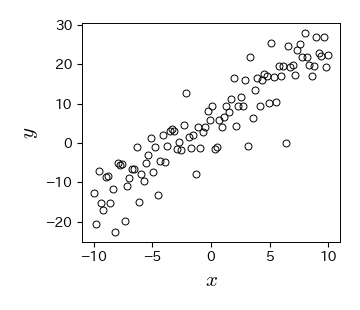

In [6]:
# データフレームに読み込む
data = pd.read_csv('./data_linear.csv')

# 散布図を描画する
fig, ax = plt.subplots()
ax.plot(data['x'], data['y'], 'ko', mfc='None')
ax.set_xlabel('$x$', fontsize=15); ax.set_ylabel('$y$', fontsize=15);

**3. カーブフィッティングを実行する**

`curve_fit` 関数には，第1引数にフィッティング関数，第2引数に $ x $ 座標のデータ，第3引数に $ y $ 座標のデータを指定する．
また，第4引数以降にはオプションとしてパラメータの初期値 `p0` などを指定することができる．
`curve_fit` 関数を実行すると，最小二乗法によって得られた最適なパラメータ（`p_opt`） と共分散（`p_cov`）が戻り値として得られる．

In [7]:
# フィッティングの実行
p_opt, p_cov = curve_fit(f_linear, data['x'], data['y'], p0=[1, 1])
print(p_opt)

[1.98260805 5.1755    ]


以下は公式を用いて最適解を求めた結果である．
確かに，`curve_fit` 関数から求めた値と同じ値が得られていることが分かる．

In [8]:
# 公式から
nume = np.mean(data['x'] * data['y']) - np.mean(data['x']) * np.mean(data['y'])
denom = np.mean(data['x']**2) - np.mean(data['x'])**2
a = nume / denom
b = np.mean(data['y'] - a*data['x'])
print(a, b)

1.982608050078137 5.1754999999999995


**4. カーブフィッティングの結果を可視化する**

散布図にモデルによる予測値を重ねてプロットすることで，カーブフィッティングの結果を可視化する．

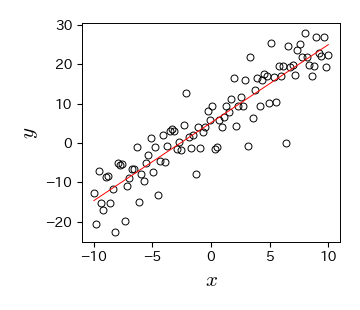

In [9]:
fig, ax = plt.subplots()
ax.plot(data['x'], data['y'], 'ko', mfc='None')
ax.plot(data['x'], f_linear(data['x'], p_opt[0], p_opt[1]), 'r-', mfc='None')
ax.set_xlabel('$x$', fontsize=15); ax.set_ylabel('$y$', fontsize=15);

**5. 決定係数を求める**

In [10]:
# 決定係数
y_reg = f_linear(data['x'], p_opt[0], p_opt[1]) # 回帰直線の値
R2 = 1 - np.var(data['y'] - y_reg) / np.var(data['y']) # 決定係数
R2

0.8436605083584496

In [11]:
# 相関係数の２乗
r_xy = data['x'].corr(data['y']) # pandasのcorr()関数で相関係数を計算
r_xy**2

0.8436605083584496

### 非線形単回帰モデル

次に，非線形単回帰モデルを考える．
この場合はフィッティング関数に任意の非線形関数 $ f(x; \boldsymbol{\theta}) $ を指定することができる．
フィッティングの手順は線形単回帰モデルの場合と同様である．

**1. カーブフィッティングに用いる関数（モデル）を定義する**

In [12]:
def f_exp(x, a, b, c):
    return a * np.exp(-b * x) + c

この関数は，第1引数に $ x $ 座標のデータ，第2引数以降にパラメータ $ a, b, c $ を入力し，$ y $ 座標の予測値を出力する．

**2. 実データを準備する**

ここでは，モデルから生成したデータに乱数による誤差を加えたデータをcsv形式で一旦保存し，その後Pandasのデータフレームに読み込む．

In [13]:
# データの作成
np.random.seed(4321)
x_data = np.linspace(0, 4, 50)
y_data = f_exp(x_data, 2.5, 1.3, 0.5) + 0.2 * np.random.normal(size=len(x_data))
data = pd.DataFrame({'x': x_data, 'y': y_data})

# データをcsv形式で保存
data.to_csv('./data_exp.csv', index=False, float_format="%10.2f")

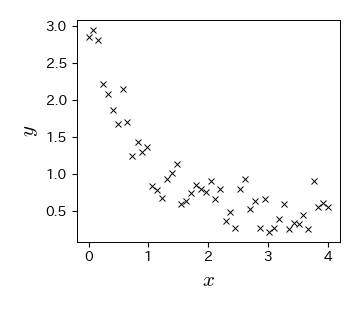

In [36]:
# データフレームに読み込む
data = pd.read_csv('./data_exp.csv')

# 散布図の描画
fig, ax = plt.subplots()
ax.plot(data['x'], data['y'], 'x')
ax.set_xlabel('$x$', fontsize=15); ax.set_ylabel('$y$', fontsize=15);

**3. カーブフィッティングを実行する**

In [14]:
# フィッティングの実行
p_opt, p_cov = curve_fit(f_exp, data['x'], data['y'], p0=[1,1,1])
print(p_opt)

[2.59425594 1.28716833 0.44943101]


**4. カーブフィッティングの結果を可視化する**

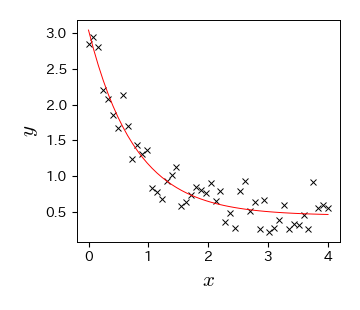

In [15]:
fig, ax = plt.subplots()
ax.plot(data['x'], data['y'], 'x')
ax.plot(data['x'], f_exp(data['x'], p_opt[0], p_opt[1], p_opt[2]), 'r-', mfc='None')

ax.set_xlabel('$x$', fontsize=15); ax.set_ylabel('$y$', fontsize=15);

**5. 決定係数を求める**

In [16]:
# 決定係数
y_reg = f_exp(data['x'], p_opt[0], p_opt[1], p_opt[2]) # 回帰直線の値
R2 = 1 - np.var(data['y']-y_reg) / np.var(data['y']) # 決定係数
R2

0.9161811765106044

In [18]:
# 相関係数の２乗（線形単回帰モデル以外の場合は決定係数と一致しない）
r_xy = data['x'].corr(data['y']) # pandasのcorr()関数で相関係数を計算
r_xy**2

0.6577469204652011

### 演習問題

**A. 最小二乗法の解析解**
   
1. 線形単回帰モデルについて，式{eq}`eq:lsm_solution`を導け
   
**B. Excelによる最小二乗法**

1. `data_linear.csv`をエクセルで開いて散布図を描け
2. 近似曲線の追加機能（オプションは線形近似）から近似曲線を追加せよ．その際に，「グラフに数式を表示する」と「グラフにR-２乗値を表示する」にチェックを入れること．
3. Excelで表示された結果がPythonによるカーブフィッティングの結果と一致することを確認せよ．

**C. サッカー選手の身長と体重**

1. [soccer_player_europe_2017.csv](https://drive.google.com/uc?export=download&id=12-NKKj-fHFfCRHhQfJ6sTdZjDRxLc1hX)は，2017シーズンにサッカーのヨーロッパ5大リーグに所属していた選手のプロフィールである．データをダウンロードし，データフレームに読み込め
2. 体重（`weight`）が0となっている選手を削除せよ
3. 横軸に体重（`weight`），縦軸に身長（`height`）を取った散布図を描け
4. 線形単回帰モデルによるカーブフィッティングを実行し，散布図に回帰直線を追加せよ
   
   ※ 本データの出典：[L. Pappalardo et al., Sci Data 6, 236 (2019).](https://www.nature.com/articles/s41597-019-0247-7)

**D. コロナウイルスの感染者数の増加**
   
1. [covid19_korea.csv](https://drive.google.com/uc?export=download&id=12-dPS038xvax8KwIZLYv2OFMZ55J-WaK)は，韓国における新型コロナウイルス感染者数の推移データである．データをダウンロードし，データフレームに読み込め<br>※ 本データの出典：[John Hopkins CSSE](https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_time_series)
2. データフレームに2020年1月22日を0日とした経過日数を追加せよ
3. 横軸に経過日数，縦軸に感染者数を取った散布図を描け．
4. 50日目までの散布図に対して，以下のシグモイド関数によるフィッティングを実行し，散布図にフィッティング曲線を追加せよ．

   $$
   f(t) = \frac{a}{1+b\mathrm{e}^{-ct}}
   $$
   
   なお，シグモイド関数をそのまま実装するとオーバーフローが発生する可能性があるため，以下のように`np.clip`関数を用いてオーバーフローを回避すること：
   ```
   def f_sigmoid(t, a, b, c):
       return a*(1+b*np.exp(-np.clip(c*t, -709, 100000)))**(-1)
   ```
   
5. 同様に，100日目までの散布図に対して，以下のシグモイド関数によるフィッティングを実行し，散布図にフィッティング曲線を追加せよ．


## 確率分布のパラメータ推定


手元にあるデータから作成したヒストグラムがある確率分布に従うと仮定し，データに合うように確率分布のパラメータを推定することもカーブフィッティングの一つである．

確率分布のパラメータ推定では，以下の方法がよく用いられる：

- 最小二乗法
- 最尤推定

このうち，最小二乗法によるパラメータ推定は回帰分析と全く同じ手続きである．
以下では最尤推定を中心に説明する．

### ヒストグラムの作成とフィッティング

まずは，与えられたデータからヒストグラムを描画し，適当な確率分布を重ね描きするプログラムを作成しておく．
以下は，正規分布に従う乱数を生成し，そのヒストグラムに正規分布の確率密度関数を重ね描きする例である．
確率密度関数の`mean`（平均）と`sd`（標準偏差）を変化させると，ヒストグラムに重ね描きされる確率密度関数が変化することが確認できる．
これがヒストグラムに対するカーブフィッティングである．

In [5]:
# scipy.statsから必要な関数をインポート
from scipy.stats import bernoulli, norm, poisson, expon

In [6]:
def f_norm(x, mu, sigma):
    # 正規分布の確率密度関数
    return norm.pdf(x, loc=mu, scale=sigma)

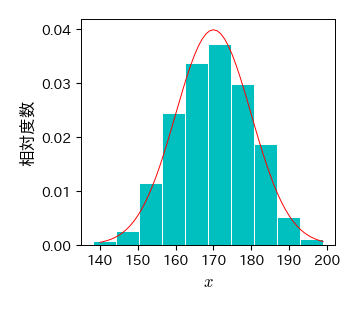

In [8]:
# データの作成（平均170，標準偏差10の正規分布に従うデータを1000個生成）
np.random.seed(20)
data = sp.stats.norm.rvs(loc=170, scale=10, size=1000)

# ヒストグラムを描画する
fig, ax = plt.subplots()
ret = ax.hist(data, bins=10, density=1, color='c', edgecolor='w')
ax.set_xlabel('$x$', fontsize=12)
ax.set_ylabel('相対度数', fontsize=12)
ax.set_xticks(np.arange(130, 210, 10));

# 確率密度関数を描画する
mean, sd = 170, 10  # 確率密度関数のパラメータ（平均と標準偏差）
x = np.arange(140, 200)
fx = norm.pdf(x, loc=mean, scale=sd)
ax.plot(x, fx, 'r-');  # 正規分布の確率密度関数を描画

### 最尤推定

```{admonition} 確率分布の表記
これまで，パラメータ $ \boldsymbol{\theta} $ を持つ1次元確率分布を $ f(x; \boldsymbol{\theta}) $ と表記していたが，変数と定数の区別を強調するために，これ以降は $ f(x\mid \boldsymbol{\theta}) $ と表記する．
例えば，$ f(x\mid \boldsymbol{\theta}) $ と書いたときは，$ \boldsymbol{\theta} $ は与えられた定数（前提条件），$ x $ は変数を表しており，$ f(x\mid \boldsymbol{\theta}) $ は $ x $ の関数であると解釈できる．
```

####  $ n $ 個のデータが生成される同時確率

ある確率分布 $ f(x\mid \boldsymbol{\theta}) $ に従う母集団から $ n $ 個のデータ $ (x_{1}, x_{2}, \ldots, x_{n}) $ を独立に生成することを考える．
このとき，データ $ (x_{1}, x_{2}, \ldots, x_{n}) $ が得られる同時確率はどのように表されるだろうか？
ここでは，データの生成元から見た場合とデータの観測者から見た場合の2通りの視点で考える．

```{figure} ../figure/maximum_likelihood.png
---
height: 180px
name: fig:maximum_likelihood
---
母集団からのデータ生成とパラメータ推定の模式図
```

**データの生成元からの視点**

まず，データの生成元（母集団）から見た場合，母集団分布 $ f(x\mid \boldsymbol{\theta}) $ のパラメータ $ \boldsymbol{\theta} $ は分かっており，毎回確率的にデータ $ x_{i} $ が生成される．
このとき，$ x_{i} $ というデータが生成される確率は $ f(x_{i}\mid \boldsymbol{\theta}) $ であるので，$ n $ 個の独立なデータが得られる同時確率は

$$
    f(x_{1}, x_{2},\ldots, x_{n}\mid \boldsymbol{\theta}) = f(x_{1}\mid \boldsymbol{\theta})f(x_{2}\mid \boldsymbol{\theta})\cdots f(x_{n}\mid \boldsymbol{\theta})
$$(eq:joint_probability_1)

と表される（データが独立に生成されるので，同時確率が個々の確率の積で書ける）．
このように，パラメータ $ \boldsymbol{\theta} $ が定数で，生成されるデータ $ (x_{1}, x_{2}, \ldots, x_{n}) $ が変数の場合には$ f(x_{1}, x_{2},\ldots, x_{n}\mid \boldsymbol{\theta}) $ という表記になる．

**データの観測者からの視点**

次に，同じ状況をデータの観測者から見ると，手元のデータ $ (x_{1},\ x_{2},\ \ldots, x_{n}) $ はどのような母集団分布から生成されたのだろうか？という見方になる．
このとき，データの観測者は母集団分布の情報が何も分からないので，通常は母集団分布 $ f(x\mid \boldsymbol{\theta}) $ の関数形を適当に仮定し，そのパラメータ $ \boldsymbol{\theta} $ を変数としてこれを推定する（これを確率分布のパラメータ推定と呼ぶ）．
この状況において，手元の $ n $ 個のデータが得られる同時確率は式{eq}`eq:joint_probability_1`の右辺で計算できるが，データ $ (x_{1},\ x_{2},\ \ldots, x_{n}) $ が定数で，パラメータ $ \boldsymbol{\theta} $ が変数であることを明示するために次のように表記する：

$$
    L(\boldsymbol{\theta}\mid x_{1},\ldots, x_{n}) = f(x_{1}\mid \boldsymbol{\theta})f(x_{2}\mid \boldsymbol{\theta})\cdots f(x_{n}\mid \boldsymbol{\theta})
$$(eq:joint_probability_2)

これを**尤度関数**と呼ぶ．
式{eq}`eq:joint_probability_2`（尤度関数）と式{eq}`eq:joint_probability_1`（同時確率）は，データとパラメータのどちらを変数と見るかの違いだけで，データが得られる同時確率を意味することは変わらない．

#### 最尤推定法

尤度関数は，手元のデータが得られる同時確率を母集団分布のパラメータ $ \boldsymbol{\theta} $ の関数として捉えたものである．
いま，手元のデータから生成元の確率分布のパラメータを推定する際，どのような値が最も良いかを考える．
このとき，尤度は手元のデータが得られる確率であるため，尤度が小さいパラメータは（生起確率が低いためあり得ないことが起こっているので）不適切と考えられる．
そこで，手元に $ n $ 個のデータが与えられたとき，尤度関数 $ L(\boldsymbol{\theta} \mid x_{1}, x_{2}, \ldots, x_{n}) $ を最大化するパラメータ $ \boldsymbol{\theta} $ を最も尤もらしいパラメータと考える．
これは確率分布のパラメータ推定手法の一つであり，**最尤推定法**と呼ばれている。

#### 対数尤度方程式

尤度関数を最大にするようなパラメータを求めるには，尤度関数を各パラメータで偏微分して0になるという条件を課せば良いが，通常は尤度関数の対数を取った**対数尤度関数**に対して偏微分を実行する：

$$
    \frac{\partial \log L}{\partial \theta_{1}} = 0, \quad \frac{\partial \log L}{\partial \theta_{2}} = 0, \quad \cdots
$$

この条件式は**対数尤度方程式**と呼ばれている．
このように対数尤度関数を考えると，得られる解は尤度関数を偏微分した場合と変わらないが，以下のメリットがある：

- 尤度関数の積が和の形に分解できるので計算が簡単になる
- 尤度関数が極端に小さい値になることを防ぐ（確率の積は非常に小さくなる）

なお，最尤推定値が実際に計算可能かどうかは対数尤度関数の形によって異なる．
例えば，対数尤度関数が凸関数の場合には対数尤度方程式を解くことで大域解が求まるが，非凸関数の場合には局所解しか求まらないことがある．
また，対数尤度関数は非常に複雑な形をしていることが多いため，数値解を求めるための様々なアルゴリズム（例えば，勾配法やEMアルゴリズムなど）が考案されている．

### ベルヌーイ分布の最尤推定

最尤推定の具体例として，まずはデータ生成元の確率分布がベルヌーイ分布に従う場合を考える．
ベルヌーイ分布とは，以下の式で与えられる離散型確率分布である：

$$
    f(x\mid p) = p^{x}(1-p)^{1-x}
$$

ここで，$ x $ の取りうる値は $ 0, 1 $ の2値である．
ベルヌーイ分布はコイン投げのように確率変数 $ X $ が2値を取るような試行（ベルヌーイ試行）を1回行ったときの確率分布であり，$ p $ は $ x=1 $ となる確率（表が出る確率）を表すパラメータである．

ベルヌーイ分布の場合，以下のように最尤推定値の解析解を計算することができ，その結果は観測データの標本平均となる．
例えば，コインを5回投げて最初に表が連続して3回出たとすると，データは $ (1,1,1,0,0) $ である．
よって，この場合の最尤推定値は $ p=3/5 $ となる．

```{admonition} ベルヌーイ分布の最尤推定（解析解）
:class: dropdown
観測データ $ (x_{1}, \ldots, x_{n}) $ に対する尤度関数は

$$
    L(p\mid x_{1}, \ldots, x_{n}) = \prod_{i=1}^{n} p^{x_{i}}(1-p)^{1-x_{i}}=p^{\sum_{i}x_{i}}(1-p)^{n-\sum_{i}x_{i}}
$$

となるので，対数尤度関数は

$$
    \log L(p\mid x_{1}, \ldots, x_{n}) = \left(\sum_{i} x_{i}\right) \log p + \left(n-\sum_{i}x_{i}\right)\log(1-p)
$$

と表される．

これより，対数尤度方程式は

$$
    \frac{dL}{dp} = \frac{\sum_{i}x_{i}}{p} - \frac{n-\sum_{i}x_{i}}{1-p} = 0
$$

となり，これを解けば

$$
    p = \frac{1}{n} \sum_{i=1}^{n} x_{i}
$$

が得られる．
```

#### Pythonによる実装

**1. データの生成**

パラメータ $ p $ のベルヌーイ分布から100個のデータ（サイズ100の標本）を生成する．
ここでは，$ p=0.3 $ とする．これが母集団分布のパラメータの真の値となる．

In [9]:
# データの作成
np.random.seed(seed=35)
x = bernoulli.rvs(p=0.3, size=100)
x

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0])

**2. 尤度関数の計算**

次に，得られた観測データから尤度関数を計算する．
以下では，0から1まで0.01刻みでパラメータpの値を発生させ，配列`P`に格納する．
また，同じサイズの配列`L`を作成し，配列`P`の各値に対応する尤度を求めて格納する．
同様に，対数尤度を配列`log_L`に格納する．

In [10]:
L, log_L = [], []
P = np.arange(0, 1, 0.01)

# 様々なPについて尤度と対数尤度を計算する
for p in P:
    # 尤度の計算
    l = np.prod(bernoulli.pmf(x, p))
    L.append(l)
    
    # 対数尤度の計算
    log_l = np.sum(np.log(np.maximum(bernoulli.pmf(x, p), 1e-100))) # logの中身が極端に小さいときは1e-100に置き換える
    log_L.append(log_l)

L = np.array(L)  # 尤度関数
log_L = np.array(log_L)  # 対数尤度関数

**3. 最尤推定値を求める**

2.の時点で様々なパラメータ $ p $ の値に対して尤度 $ L $ と対数尤度 $ \log L $ が求まっている．
このうち，尤度の値はサンプルサイズが100程度でも非常に小さい値になっていることに注意する．
サンプルサイズをこれ以上増やすと尤度の値はさらに小さくなるため，数値計算の際には対数尤度を用いた方が良い．

In [12]:
pd.DataFrame({'P': P, 'L': L, 'log_L': log_L})

,P,L,log_L
0,0.00,0.000000e+00,-6216.979751
1,0.01,4.801415e-55,-125.073270
2,0.02,3.071238e-47,-107.099419
3,0.03,8.252974e-43,-96.900585
4,0.04,9.149972e-40,-89.889653
...,...,...,...
95,0.95,2.650621e-96,-220.073375
96,0.96,2.962802e-103,-236.080129
97,0.97,2.969535e-112,-256.801125
98,0.98,5.473861e-125,-286.123152


`np.argmax`関数を用いると，ある配列について最大値に対応するインデックスを取得できる．
これを用いれば，尤度および対数尤度が最大となるパラメータを取得できる．
いずれの場合も同じ最尤推定値が得られ，解析解（標本平均）と等しいことが分かる．

In [21]:
# 尤度Lの最大値を与えるパラメータ
p_mle_1 = P[np.argmax(L)]
p_mle_1

0.27

In [23]:
# 対数尤度log_Lの最大値を与えるパラメータ
p_mle_2 = P[np.argmax(log_L)]
p_mle_2

0.27

In [24]:
# 最尤推定値の解析解（標本平均）
np.mean(x)

0.27

**4. 尤度関数と最尤推定値を描画する**

最後に，尤度関数を描画し，さらに尤度関数が最大となる $ p $ の値をグラフ中にプロットする．

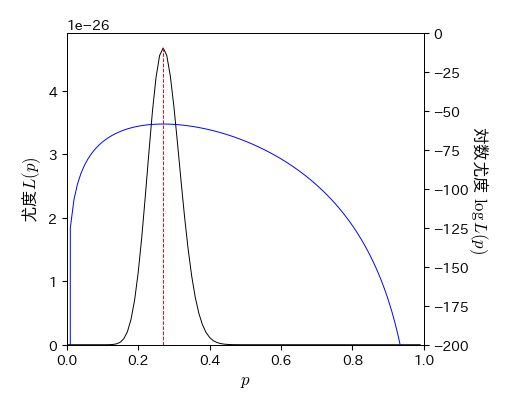

In [20]:
fig, ax = plt.subplots(figsize=(5, 4))

# 尤度関数の描画
ax.plot(P, L, '-') # 尤度関数
ax.vlines(p_mle_1, 0, np.max(L), color='r', linestyles='dashed') # 尤度関数Lの最大値を与えるパラメータを赤線で表示
ax.set_xlabel('$p$', fontsize=12)
ax.set_ylabel('尤度$L(p)$', fontsize=12)
ax.set_xlim(0, 1); ax.set_ylim(ymin=0)

# 対数尤度関数の描画
ax2 = ax.twinx() # 新しいy軸を作成
ax2.plot(P, log_L, 'b-') # 対数尤度関数
ax2.set_xlabel('$p$', fontsize=12)
ax2.set_ylabel('対数尤度 $\log L(p) $', fontsize=12, rotation=-90, labelpad=15)
ax2.set_xlim(0, 1); ax2.set_ylim(-200, 0);

### 正規分布の最尤推定

次に，最尤推定値の解析解が求まるもう少し複雑な例として，生成元の確率分布が正規分布の場合を考える．
正規分布の確率密度関数は以下で与えられる：

$$
    f(x\mid \mu, \sigma) = \frac{1}{\sqrt{2\pi\sigma^2}} \mathrm{e}^{-\frac{(x-\mu)^2}{2\sigma^2}}
$$

ここで，$ \mu, \sigma $ がパラメータでそれぞれ期待値と標準偏差に対応する．
正規分布のパラメータ $ \mu,\ \sigma^2 $ の最尤推定値はそれぞれ標本平均と標本分散となる．

```{admonition} 正規分布の最尤推定（解析解）
:class: dropdown

観測データ $ x_{1}, \ldots, x_{n} $ に対する尤度関数は

$$
    L(\mu, \sigma\mid x_{1}, \ldots, x_{n}) = \prod_{i=1}^{n} \frac{1}{\sqrt{2\pi\sigma^2}} \mathrm{e}^{-\frac{(x_{i}-\mu)^2}{2\sigma^2}}
    = \frac{1}{(2\pi\sigma^2)^{n/2}} \exp\left[-\frac{1}{2\sigma^2}\sum_{i=1}^{n}(x_{i}-\mu)^2\right]
$$

となるので，対数尤度関数は

$$
    \log L = -\frac{n}{2} \log(2\pi) -\frac{n}{2} \log(\sigma^2) - \frac{1}{2\sigma^2} \sum_{i=1}^{n} (x_{i}-\mu)^2
$$

と表される．

これより，対数尤度方程式は

\begin{align*}
    \frac{\partial \log L}{\partial \mu} &= -\frac{1}{2\sigma^2} \sum_{i=1}^{n}2(x_{i}-\mu)\times (-1)
    = \frac{1}{\sigma^2}\sum_{i}^{n}(x_{i}-\mu) = 0 \\
    \frac{\partial \log L}{\partial \sigma^2} &= -\frac{n}{2\sigma^2} + \frac{1}{2\sigma^4} \sum_{i=1}^{n} (x_{i} - \mu)^2 = 0
\end{align*}

となり，これらを解けば，

\begin{align*}
    \mu &= \frac{1}{n}\sum_{i=1}^{n}x_{i}\\
    \sigma^2 &= \frac{1}{n}\sum_{i=1}^{n}(x_{i}-\mu)^2
\end{align*}

が得られる．
```

#### Pythonによる実装

**1. データの生成**

まずは平均0，標準偏差1の標準正規分布から100個のデータ（サイズ100の標本）を生成する．

In [25]:
# 標準正規分布からサイズ1000の標本を生成する
np.random.seed(seed=32)
x = norm.rvs(loc=0, scale=1, size=100)

**2. 尤度関数を計算する**

次に，得られた観測データから尤度関数を計算する．
以下では，$ \mu $ の値を-0.1から0.1の範囲，標準偏差 $ \sigma $ の値を0.9から1.1の範囲でそれぞれ100個発生させ，$ \mu $ と $ \sigma $ のパラメータの組を作る．
その上で，すべてのパラメータの組について尤度と対数尤度を計算し，それぞれ配列 `L` と `log_L` に格納する．

In [26]:
mean_range = np.linspace(-0.1, 0.1, 100)
std_dev_range = np.linspace(0.9, 1.1, 100)
M, S = np.meshgrid(mean_range, std_dev_range)
L, log_L = [], []

for m, s in zip(M.ravel(), S.ravel()):
    L.append(np.prod(norm.pdf(x, loc=m, scale=s))) # 尤度の計算
    log_L.append(np.sum(np.log(np.maximum(norm.pdf(x, loc=m, scale=s), 1e-100)))) # 対数尤度の計算

L = np.array(L).reshape(M.shape)
log_L = np.array(log_L).reshape(M.shape)

**3. 最尤推定値を求める**

 `np.where`関数を用いて，`L` および `log_L` の最大値に対応する行番号と列番号を取得する．

In [27]:
# Lとlog_Lの最大値に対応するインデックス（行番号，列番号）を取得
ind_max = np.where(L==L.max())
ind_max2 = np.where(log_L==log_L.max())
ind_max, ind_max

((array([64]), array([81])), (array([64]), array([81])))

In [28]:
# 尤度の最大値を与えるパラメータ
M[ind_max], S[ind_max]

(array([0.06363636]), array([1.02929293]))

In [29]:
# 対数尤度の最大値を与えるパラメータ
M[ind_max2], S[ind_max2]

(array([0.06363636]), array([1.02929293]))

In [30]:
# 解析解
np.mean(x), np.std(x, ddof=0)

(0.06368595578464202, 1.02857877771493)

**4. 尤度関数を描画する**

今回はパラメータが2つあるので，尤度関数と対数尤度をそれぞれ3次元プロットする必要がある．

Text(0.5, 0, 'Likelihood')

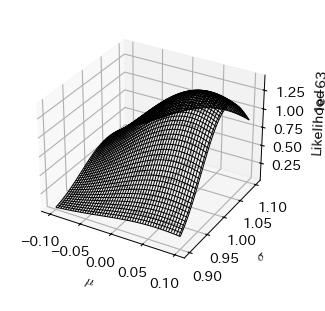

In [34]:
# 尤度関数の描画
fig, ax = plt.subplots(subplot_kw=dict(projection='3d'))
ax.plot_wireframe(M, S, L)
ax.set_xlabel('$\mu$')
ax.set_ylabel('$\sigma$')
ax.set_zlabel('Likelihood')

Text(0.5, 0, 'Log Likelihood')

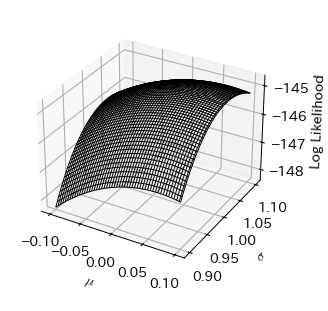

In [35]:
# 対数尤度関数の描画
fig, ax = plt.subplots(subplot_kw=dict(projection='3d'))
ax.plot_wireframe(M, S, log_L)
ax.set_xlabel('$\mu$')
ax.set_ylabel('$\sigma$')
ax.set_zlabel('Log Likelihood')

**5. 最尤推定値でカーブフィッティング**

最後に最尤推定したパラメータを用いて，正規分布の確率密度関数を描画する．
実データのヒストグラムと重ねて描画すると，上手くフィッティングできていることが分かる．

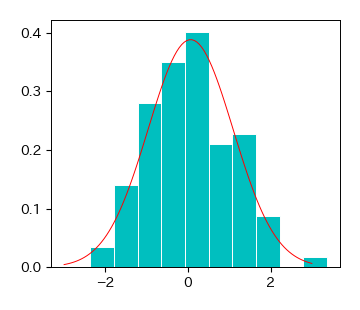

In [36]:
# ヒストグラムの描画
fig, ax = plt.subplots()
ret = ax.hist(x, bins=10, density=1, color='c', edgecolor='w')

x2 = np.linspace(-3, 3, 100)
ax.plot(x2, norm.pdf(x2, loc=np.mean(x), scale=np.std(x)), 'r-');

### 演習問題

**A. 指数分布の最尤推定（理論）**

指数分布は以下で与えられる：

$$
    f(x\mid \lambda) = \frac{1}{\lambda}\mathrm{e}^{-\frac{x}{\lambda}}
$$

1. データ $ x_{i} $ が得られる確率を求めよ
2. $ n $ 個のデータ $ x_{1}, \ldots, x_{n} $ に対する尤度関数を求めよ
3. $ n $ 個のデータ $ x_{1}, \ldots, x_{n} $ に対する対数尤度関数を求めよ
4. 対数尤度方程式を解いて， $ \lambda $ の最尤推定値を計算せよ．

<!-- **2. 指数分布の最尤推定（データ）** -->

**B. 指数分布の最尤推定（データ解析）**

準備中

**C. ポアソン分布の最尤推定（理論）**

ポアソン分布は以下で与えられる：

$$
    f(x\mid \lambda) = \frac{\lambda^{x}\mathrm{e}^{-\lambda}}{x!}
$$

1. データ $ x_{i} $ が得られる確率を求めよ
2. $ n $ 個のデータ $ x_{1}, \ldots, x_{n} $ に対する尤度関数を求めよ
3. $ n $ 個のデータ $ x_{1}, \ldots, x_{n} $ に対する対数尤度関数を求めよ
4. 対数尤度方程式を解いて， $ \lambda $ の最尤推定値を計算せよ．

**D. ポアソン分布の最尤推定（データ解析）**

準備中


**E. （難）Scipyによる最尤推定の実装**

- `scipy.optimize.minimize`関数を用いて，任意の確率分布の最尤推定を行うプログラムを作成せよ．<br>
  ※ ChatGPTなどを駆使して良い